# Classification in Practice

In [83]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils

import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import slideUtilities as sl
import laUtilities as ut
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [84]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Today we'll look at two classification methods in practice: 

* Decision Trees, and 
* k-Nearest Neighbors.

## $k$- Nearest Neighbors

First we'll generate some synthetic data to work with.

In [85]:
X, y = datasets.make_circles(noise=.1, factor=.5, random_state=1)
print('Shape of data: {}'.format(X.shape))
print('Unique labels: {}'.format(np.unique(y)))

Shape of data: (100, 2)
Unique labels: [0 1]


Here is what the data looks like:

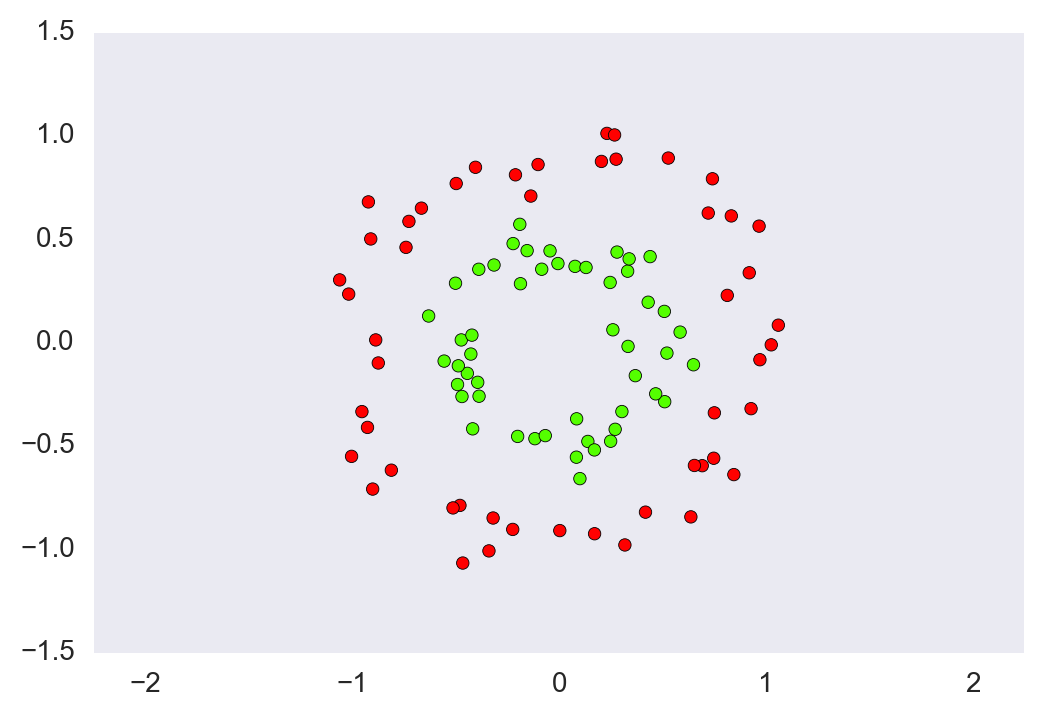

In [86]:
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y)
_ = plt.axis('equal')

Recall that we always want to test on data separate from our training data.

So we will take the first 50 examples for training and the rest for testing.

In [87]:
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

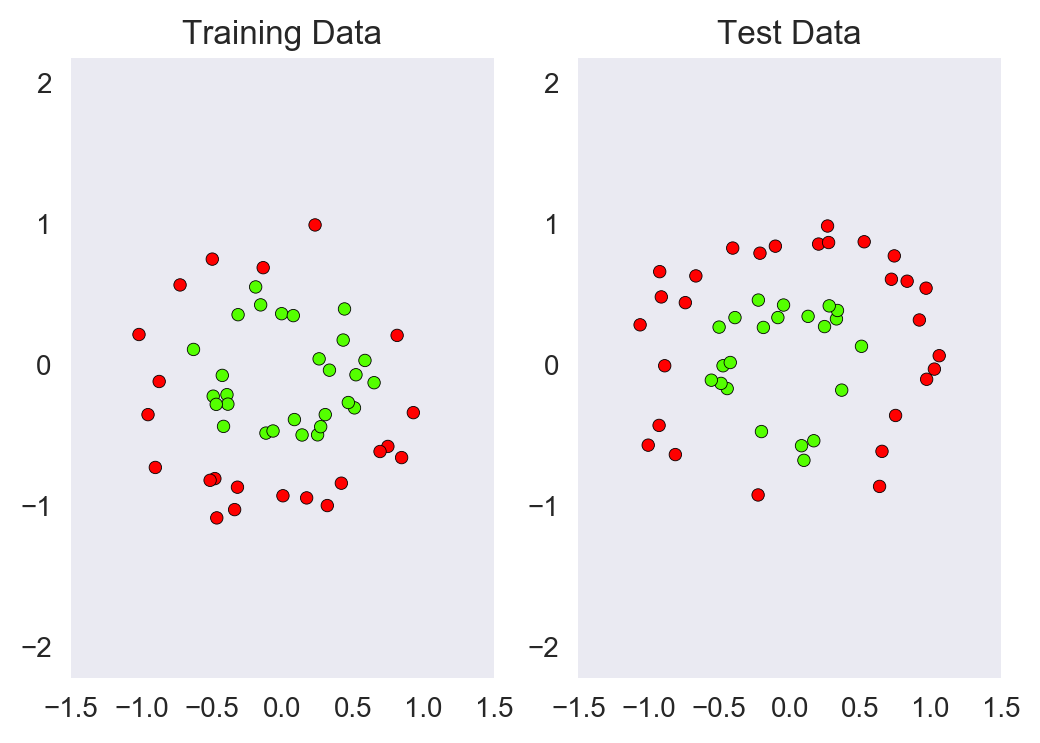

In [88]:
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, )
plt.axis('equal')
plt.title('Training Data')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Test Data')
_=plt.axis('equal')

For our first example, we will classify the points (in the two classes) using a k-nn classifier.

We will specify that $k=5$, i.e., we will classify based on the majority vote of the 5 nearest neighbors.

In [89]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)    

In the context of supervised learning, the `scikit-learn` `fit()` function corresponds to __training__ and the `predict()` function corresponds to __testing.__

In [90]:
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
print('Accuracy on test data: {}'.format(knn.score(X_test, y_test)))

Accuracy on test data: 0.72


Just for kicks we can see how the classifier does on the training data, although that's not as important as the test data.

In [91]:
y_pred_train = knn.predict(X_train)
print('Accuracy on training data: {}'.format(knn.score(X_train, y_train)))

Accuracy on training data: 0.94


Now let's visualize the results.

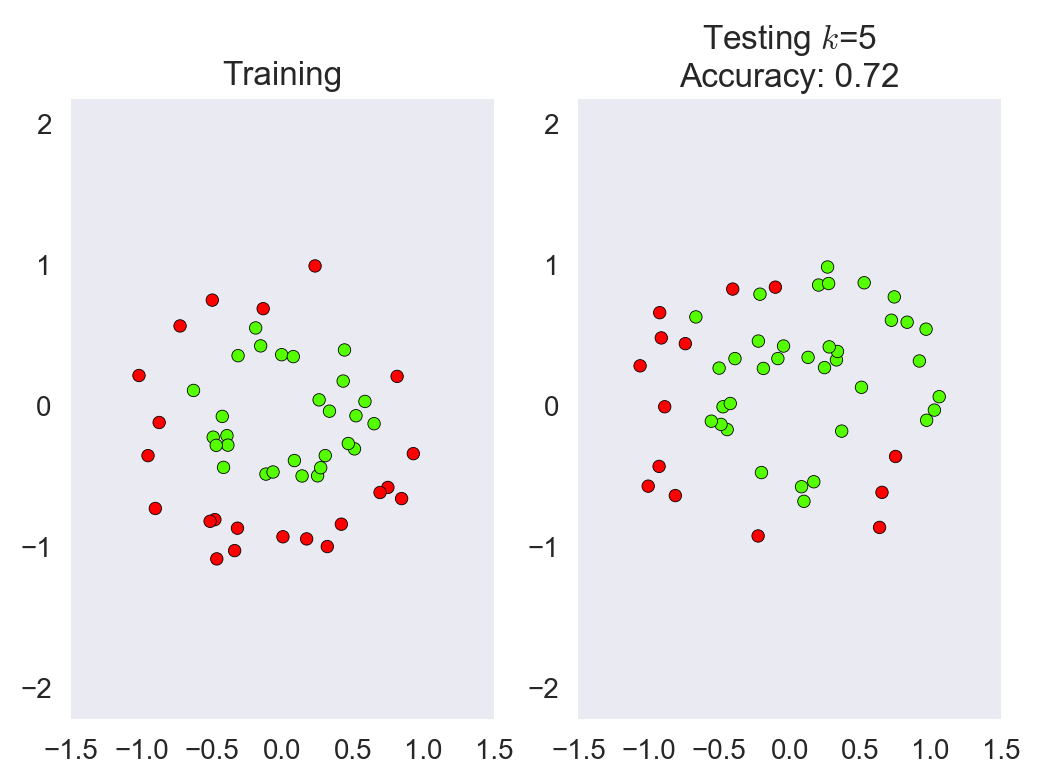

In [92]:
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.axis('equal')
plt.title('Training')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.title('Testing $k$={}\nAccuracy: {}'.format(k,knn.score(X_test, y_test)))
_=plt.axis('equal')

Let's look at one of the points that the classifier got wrong:

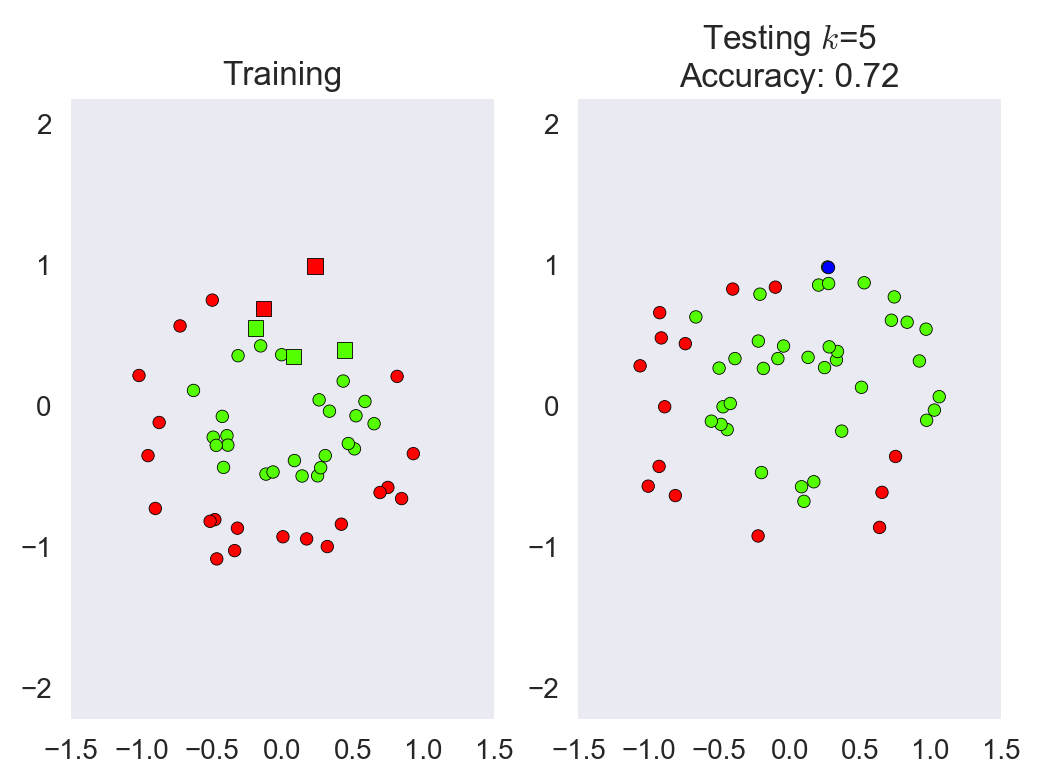

In [93]:
test_point = np.argmax(X_test[:,1])
X_test[test_point]
neighbors = knn.kneighbors([X_test[test_point]])[1]
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,)
plt.scatter(X_train[neighbors,0], X_train[neighbors,1], c = y_train[neighbors], marker='s', s=30)
plt.axis('equal')
plt.title(r'Training')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.scatter(X_test[test_point,0], X_test[test_point,1], c='b')
plt.title('Testing $k$={}\nAccuracy: {}'.format(k,knn.score(X_test, y_test)))
_=plt.axis('equal')

For comparison purposes, let's try $k$ = 3.

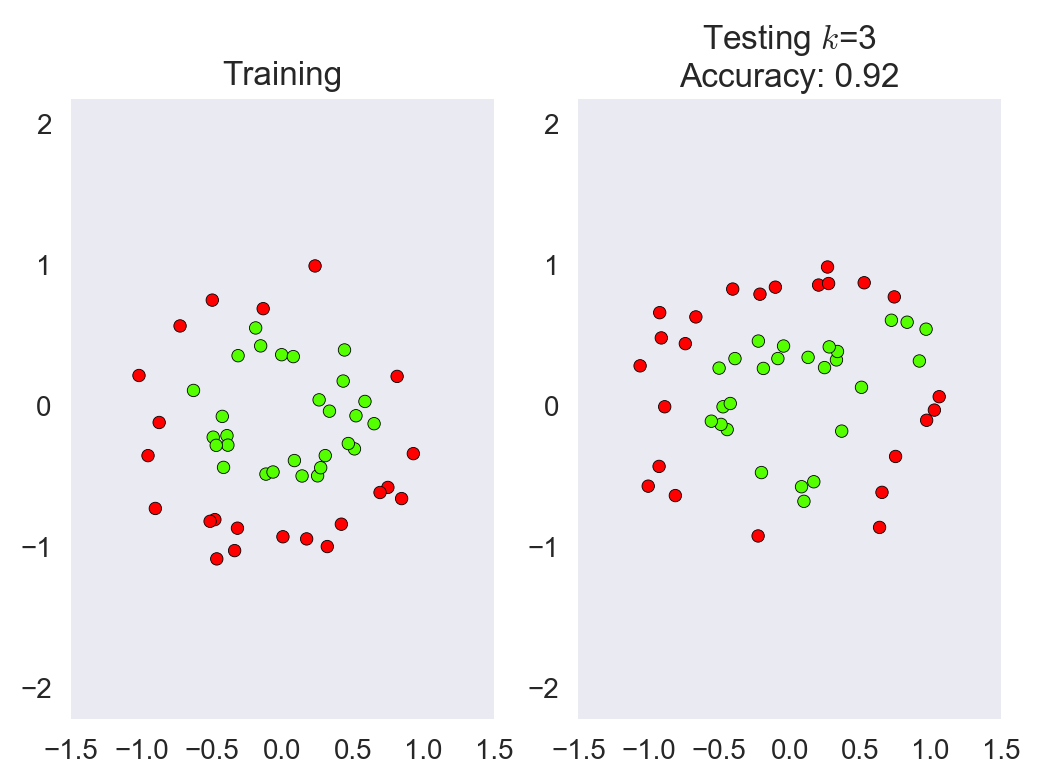

In [94]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)    
knn.fit(X_train,y_train)
y_pred_test = knn.predict(X_test)
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, )
plt.axis('equal')
plt.title(r'Training')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.title('Testing $k$={}\nAccuracy: {}'.format(k,knn.score(X_test, y_test)))
_=plt.axis('equal')

And let's look at the same individual point as before:

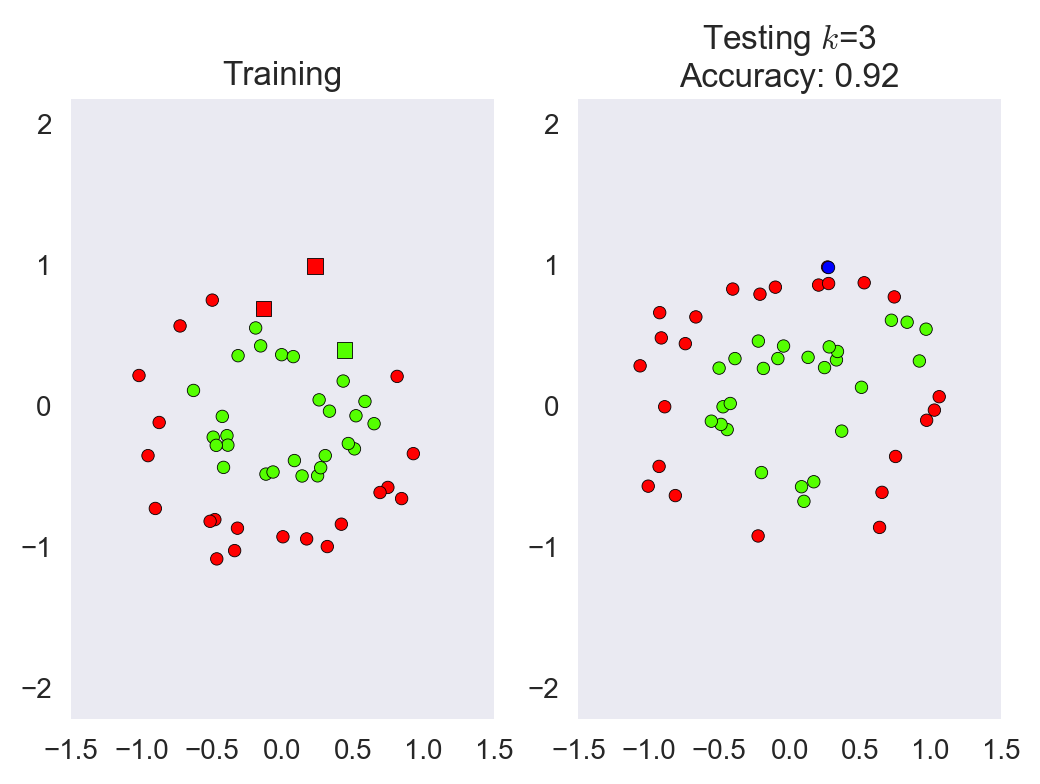

In [95]:
test_point = np.argmax(X_test[:,1])
X_test[test_point]
neighbors = knn.kneighbors([X_test[test_point]])[1]
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,)
plt.scatter(X_train[neighbors,0], X_train[neighbors,1], c = y_train[neighbors], marker='s', s=30)
plt.axis('equal')
plt.title(r'Training')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test)
plt.scatter(X_test[test_point,0], X_test[test_point,1], c='b')
plt.title('Testing $k$={}\nAccuracy: {}'.format(k,knn.score(X_test, y_test)))
_=plt.axis('equal')

## Decision Tree

Next, we'll use a decision tree on the same data set.

In [96]:
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train,y_train)
y_pred_test = dtc.predict(X_test)
print('DT accuracy on test data: ', dtc.score(X_test, y_test))
y_pred_train = dtc.predict(X_train)
print('DT accuracy on training data: ', dtc.score(X_train, y_train))

DT accuracy on test data:  0.92
DT accuracy on training data:  1.0


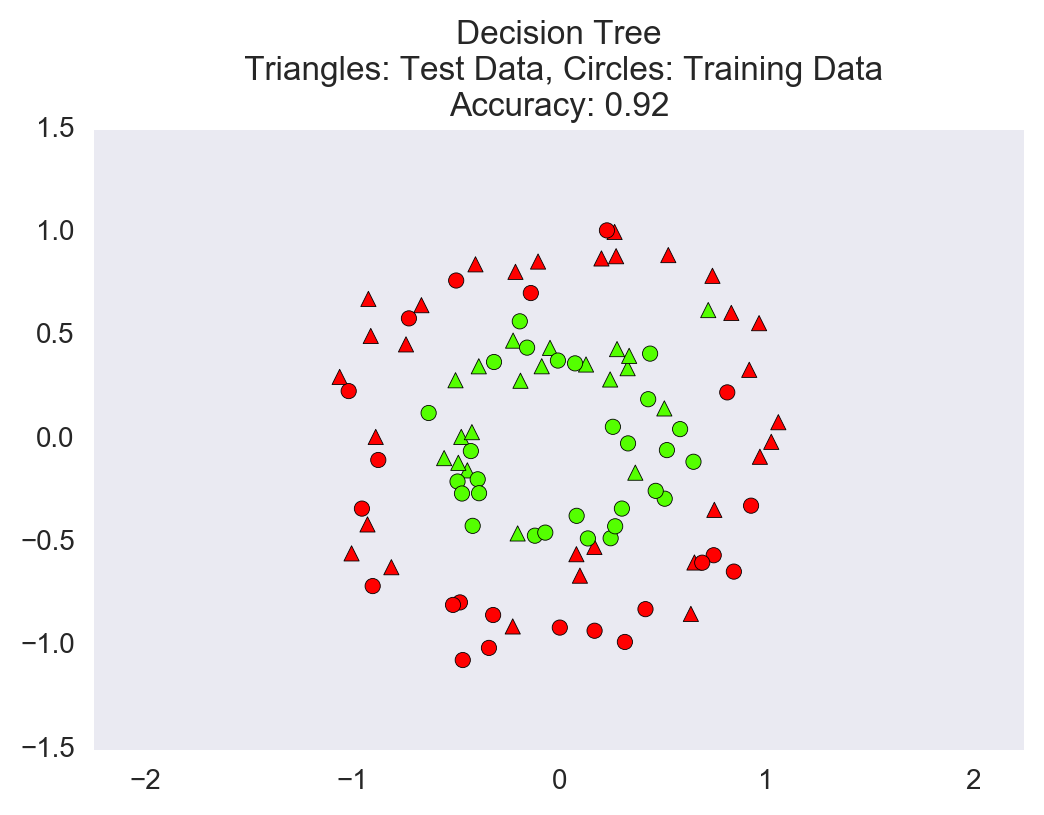

In [97]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^',s=30)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
plt.axis('equal')
_=plt.title('Decision Tree\n Triangles: Test Data, Circles: Training Data\nAccuracy: {}'.format(dtc.score(X_test, y_test)))

Let's visualize the __decision boundary__ of the Decision Tree.

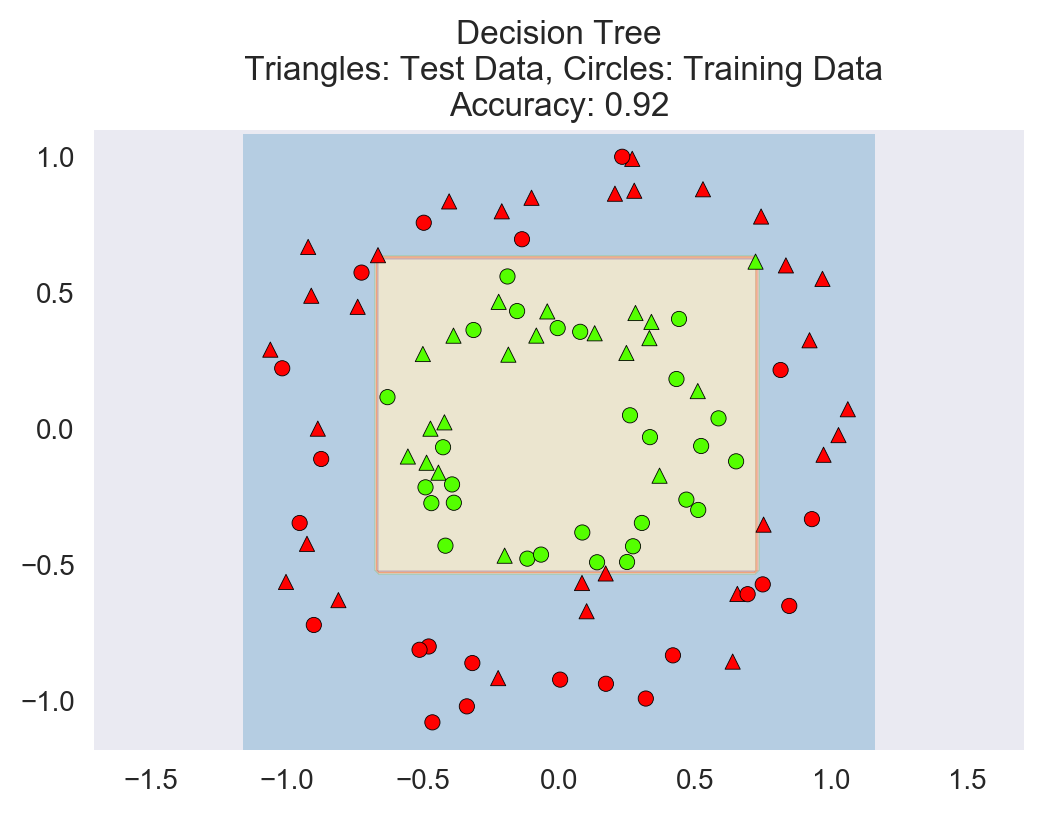

In [98]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
plot_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired,alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^',s=30)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
plt.axis('equal')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
_=plt.title('Decision Tree\n Triangles: Test Data, Circles: Training Data\nAccuracy: {}'.format(dtc.score(X_test, y_test)))

One of the big benefits of a Decision Tree is that we can 'inspect' its process.   It is a 'white box' -- its decision rule can be interpreted by the user.

Let's do that:

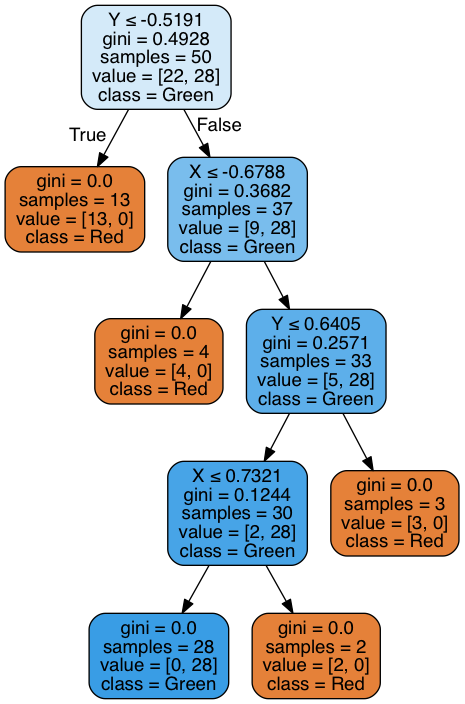

In [99]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=['X','Y'],
                         class_names=['Red','Green'],
                         filled=True, rounded=True,  
                         special_characters=True) 
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("dt.pdf") 
Image(graph.create_png())  

## "Real" data: the IRIS dataset

This is a famous dataset used by Ronald Fisher in a classic 1936 paper on classification.
https://archive.ics.uci.edu/ml/datasets/Iris

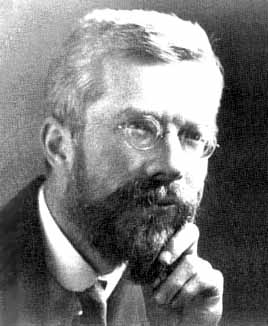

In [100]:
sl.hide_code_in_slideshow()
display(Image("figs/R._A._Fisher.png", width=250))

By http://www.swlearning.com/quant/kohler/stat/biographical_sketches/Fisher_3.jpeg, Public Domain, https://commons.wikimedia.org/w/index.php?curid=4233489

Quoting from Wikipedia:

>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

<img src="figs/Iris_setosa.png",width=200><img src="figs/Iris_versicolor.png",width=200><img src="figs/Iris_virginica.png",width=200>

In [101]:
iris = datasets.load_iris()

In [102]:
X = iris.data
y = iris.target
ynames = iris.target_names
print(X.shape, y.shape)
print(X[1,:])
print(iris.target_names)
print(y)

(150, 4) (150,)
[ 4.9  3.   1.4  0.2]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Next we split the data into training and testing:

In [103]:
X, y = utils.shuffle(X, y, random_state=1)
y

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [104]:
train_set_size = 100
X_train = X[:train_set_size]  # selects first 100 rows (examples) for train set
y_train = y[:train_set_size]
X_test = X[train_set_size:]   # selects from row 100 until the last one for test set
y_test = y[train_set_size:]
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(100, 4)
(50, 4)


(None, (50,))

Classifying using $k$-nearest neighbors, with $k$ = 5:

In [105]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [106]:
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
print("Accuracy of KNN test set:", knn.score(X_test, y_test))

Accuracy of KNN test set: 0.94


Again, to gain insight, let's look at the decision boundary.

Note that we will re-run the classifier using only two (of four) features, so we can visualize.

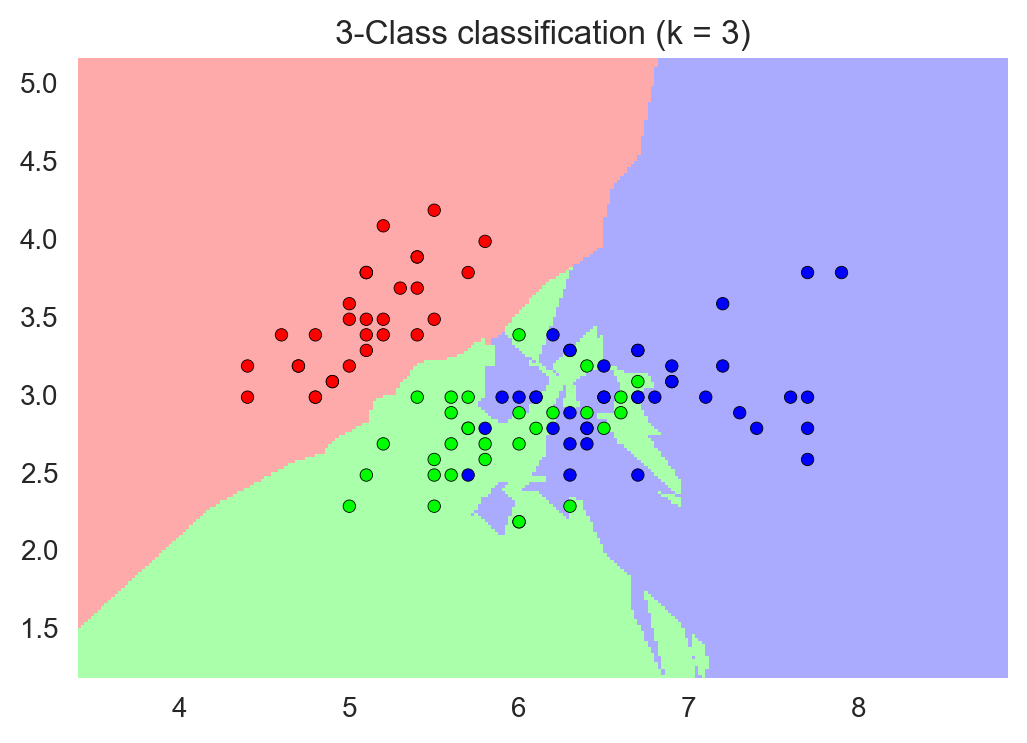

In [107]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we will use only the first two (of four) features, so we can visualize
X = X_train[:, :2] 
h = .02  # step size in the mesh
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y_train)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
_ = plt.title("3-Class classification (k = {})".format(k))

In [108]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_test = dtc.predict(X_test)
print("Accuracy of DTC test set:", dtc.score(X_test, y_test))

Accuracy of DTC test set: 0.88


And now let's visualize the decision boundary for the DT:

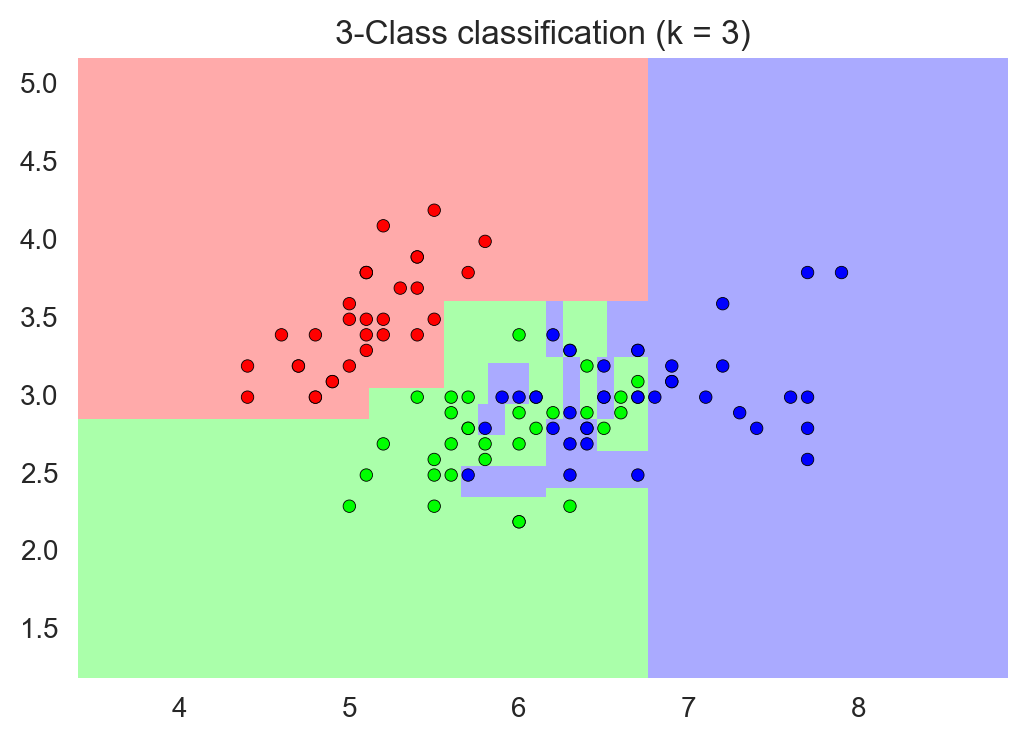

In [109]:
# we will use only the first two (of four) features, so we can visualize
X = X_train[:, :2] 
h = .02  # step size in the mesh
dtc.fit(X, y_train)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
_ = plt.title("3-Class classification (k = {})".format(k))

## "Really Real" Data: MNIST dataset

http://yann.lecun.com/exdb/mnist/

NIST used to be called the "National Bureau of Standards."  These are the folks who bring you the reference meter, reference kilogram, etc.

NIST constructed datasets for machine learning of handwritten digits. These were collected from Census Bureau employees and also from high-school students.

In [110]:
digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target

print ('Data shape: {}'.format(X_digits.shape))
print ('Data labels: {}'.format(y_digits))
print ('Unique labels: {}'.format(digits.target_names))
X_digits, y_digits = utils.shuffle(X_digits, y_digits, random_state=1)

Data shape: (1797, 64)
Data labels: [0 1 2 ..., 8 9 8]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [111]:
digits.images[3]

array([[  0.,   0.,   7.,  15.,  13.,   1.,   0.,   0.],
       [  0.,   8.,  13.,   6.,  15.,   4.,   0.,   0.],
       [  0.,   2.,   1.,  13.,  13.,   0.,   0.,   0.],
       [  0.,   0.,   2.,  15.,  11.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.,  12.,  12.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   1.,  10.,   8.,   0.],
       [  0.,   0.,   8.,   4.,   5.,  14.,   9.,   0.],
       [  0.,   0.,   7.,  13.,  13.,   9.,   0.,   0.]])

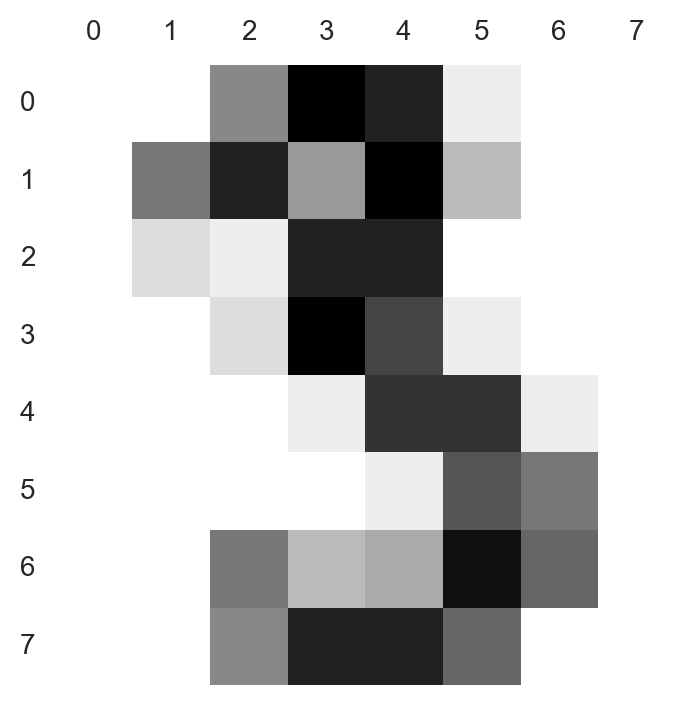

In [112]:
plt.gray() 
plt.rc('axes', grid=False)
_=plt.matshow(digits.images[3],cmap=plt.cm.gray_r) 

Notice that this is an 8 $\times$ 8 image. However we just treat it as a vector of length 64.

It is easier to visualize if we blur the pixels a little bit.

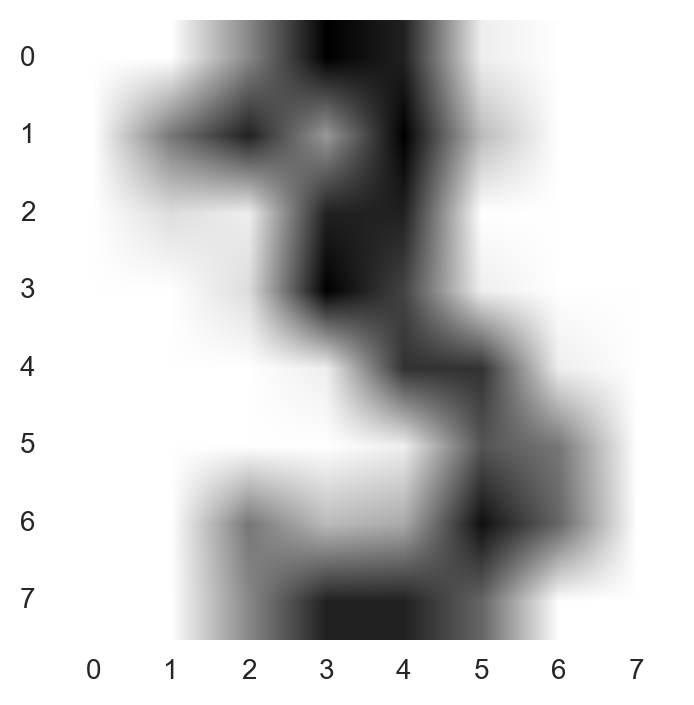

In [113]:
plt.rc('image', cmap='binary', interpolation='bilinear')
plt.rc('axes', grid=False)
plt.figure(figsize=(4,4))
_=plt.imshow(digits.images[3])

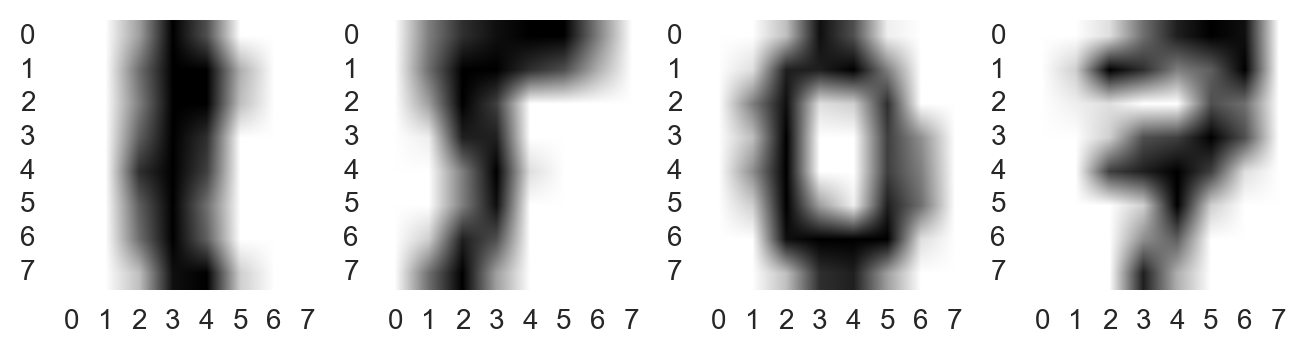

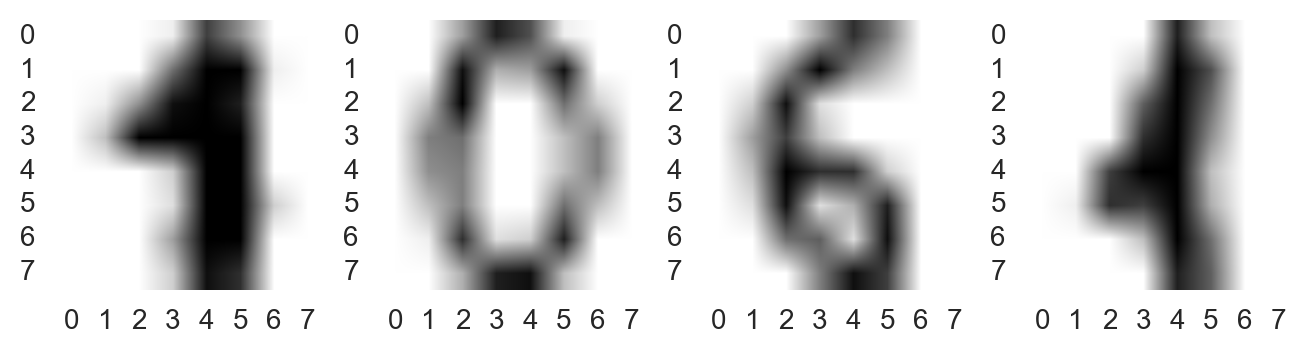

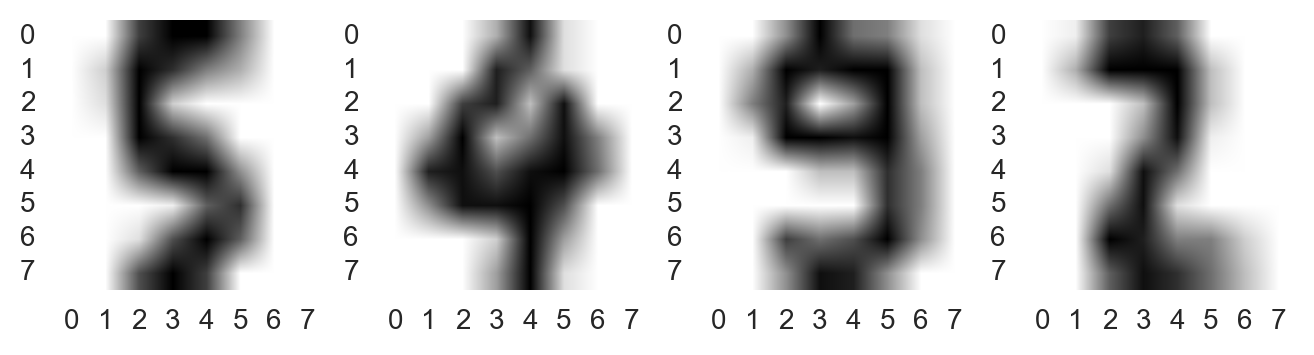

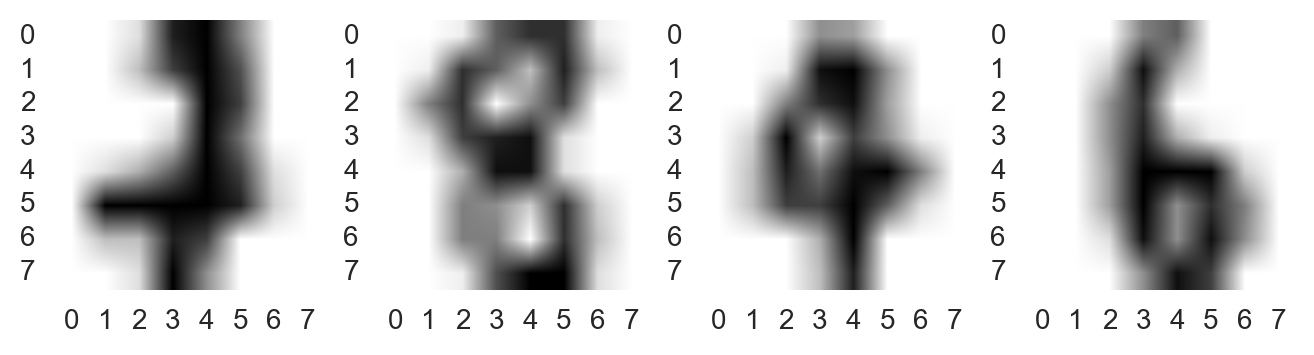

In [114]:
for t in range(4):
    plt.figure(figsize=(8,2))
    for j in range(4):
        plt.subplot(1, 4, 1 + j)
        plt.imshow(X_digits[4*t + j].reshape(8, 8))

This time we will use all classes, but only a small training set.

This points out one issue of KNN: it can be slow on a large training set (why?). 

To do model selection, we also create a test set to adjust k.

In [115]:
step = 1000;
X_digits_train = X_digits[:step]
y_digits_train = y_digits[:step]
X_digits_test = X_digits[step:len(y_digits)]
y_digits_test = y_digits[step:len(y_digits)]

Again using the k-NN classifier:

In [116]:
knn_digits = KNeighborsClassifier(n_neighbors=20)
_=knn_digits.fit(X_digits_train, y_digits_train)

In [117]:
knn_digits = KNeighborsClassifier(n_neighbors=3)
knn_digits.fit(X_digits_train, y_digits_train)
y_digits_test_pred = knn_digits.predict(X_digits_test)
print("KNN test accuracy on MNIST digits: ", knn_digits.score(X_digits_test, y_digits_test))

KNN test accuracy on MNIST digits:  0.984943538269


Looking at the nearest neighbors of some points (for k=3):

In [118]:
neighbors = knn_digits.kneighbors(X_digits_test, n_neighbors=3, return_distance=False)
print(type(neighbors))
print(neighbors.shape)

<class 'numpy.ndarray'>
(797, 3)


Let's take a look at them...

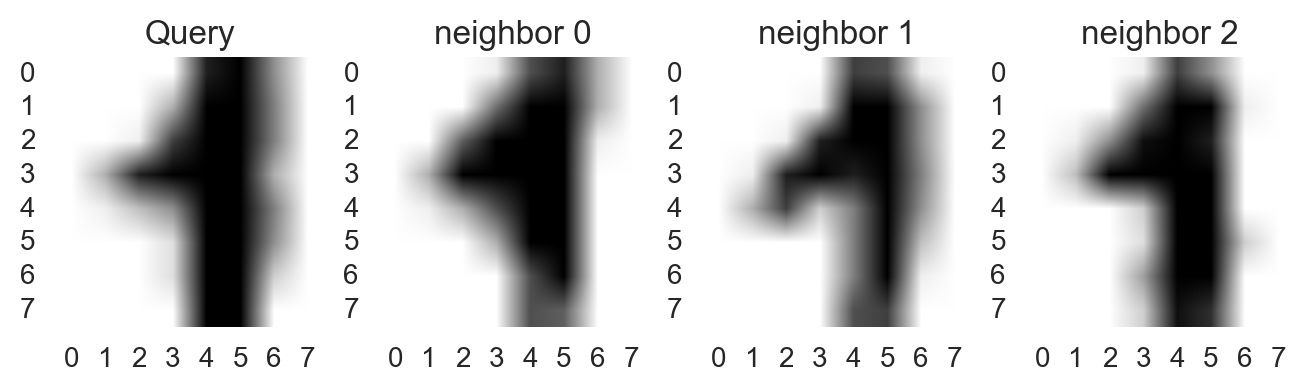

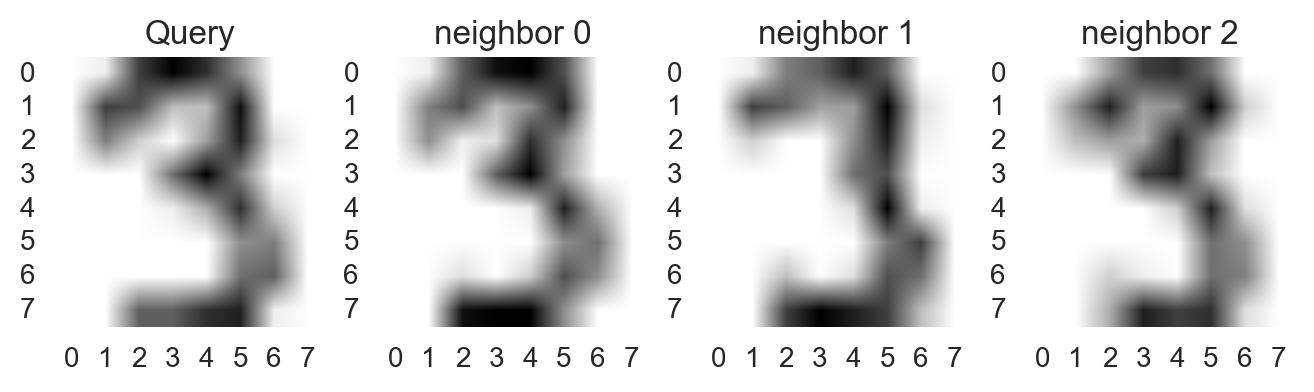

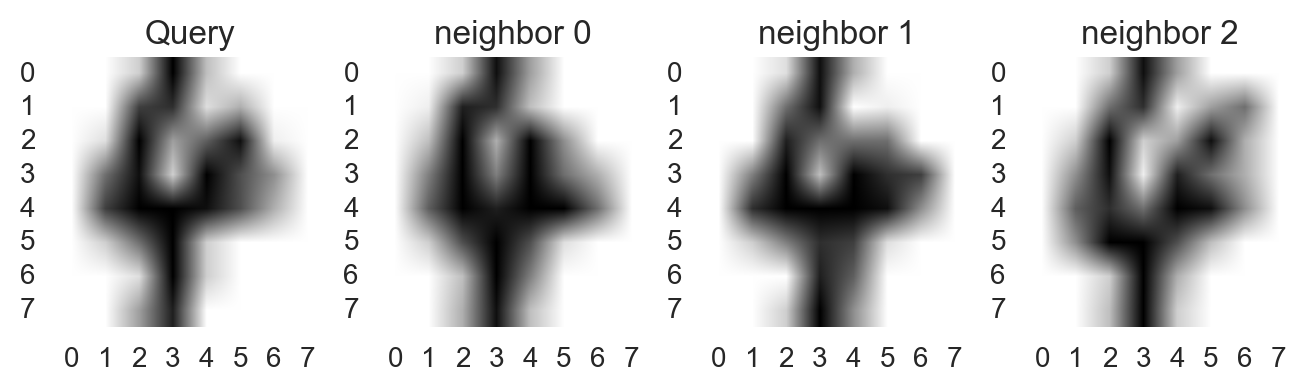

In [119]:
plt.rc("image", cmap="binary")  # this sets a black on white colormap
# plot X_digits_valid[0]
for t in range(3):
    plt.figure(figsize=(8,2))
    plt.subplot(1, 4, 1)
    plt.imshow(X_digits_test[t].reshape(8, 8))
    plt.title("Query")
    # plot three nearest neighbors from the training set
    for i in [0, 1, 2]:
        plt.subplot(1, 4, 2 + i)
        plt.title("neighbor {}".format(i))
        plt.imshow(X_digits_train[neighbors[t, i]].reshape(8, 8)) 